In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# 1) Data Preparation

In [8]:
df_m=pd.read_csv("Data/ETTm1.csv")
df_h=pd.read_csv("Data/ETTh1.csv")

In [9]:
df_m

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2,2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
3,2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
4,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
...,...,...,...,...,...,...,...,...
69675,2018-06-26 18:45:00,9.310,3.550,5.437,1.670,3.868,1.462,9.567000
69676,2018-06-26 19:00:00,10.114,3.550,6.183,1.564,3.716,1.462,9.567000
69677,2018-06-26 19:15:00,10.784,3.349,7.000,1.635,3.746,1.432,9.426000
69678,2018-06-26 19:30:00,11.655,3.617,7.533,1.706,4.173,1.523,9.426000


In [10]:
df_h

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


## Convert data to numpy


In [11]:
ot_h=df_h["OT"]
ot_m=df_m["OT"]

In [12]:
ot_h=ot_h.to_numpy()
ot_m=ot_m.to_numpy()

In [14]:
print(len(ot_h))
print(len(ot_m))

17420
69680


## Visualisasi Data

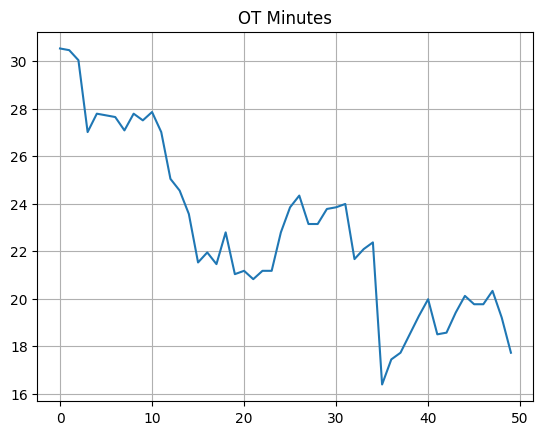

In [132]:
plt.title("OT Minutes")
plt.plot(np.arange(len(ot_m[:50])),ot_m[:50])
plt.grid(True)

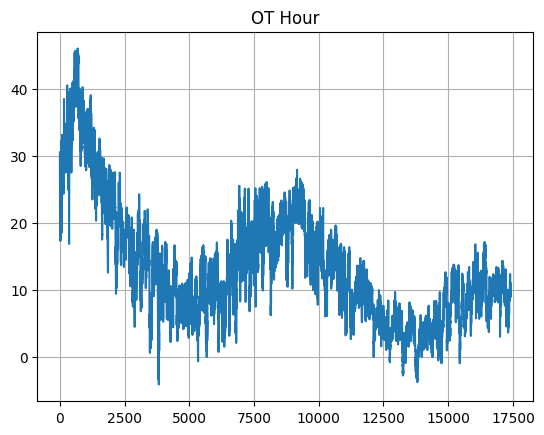

In [18]:
plt.title("OT Hour")
plt.plot(np.arange(len(ot_h)),ot_h)
plt.grid(True)

## Normalisasi Data

In [21]:
scalerMinute = MinMaxScaler()
scalerHour = MinMaxScaler()

In [23]:
ot_m_scaled = scalerMinute.fit_transform(ot_m.reshape(-1, 1))
ot_h_scaled = scalerHour.fit_transform(ot_h.reshape(-1, 1))

In [26]:
print(len(ot_m_scaled))
print(len(ot_h_scaled))

69680
17420


In [31]:
ot_m_scaled=ot_m_scaled.reshape(-1)
ot_h_scaled=ot_h_scaled.reshape(-1)

In [33]:
print(len(ot_m_scaled))
print(len(ot_h_scaled))

69680
17420


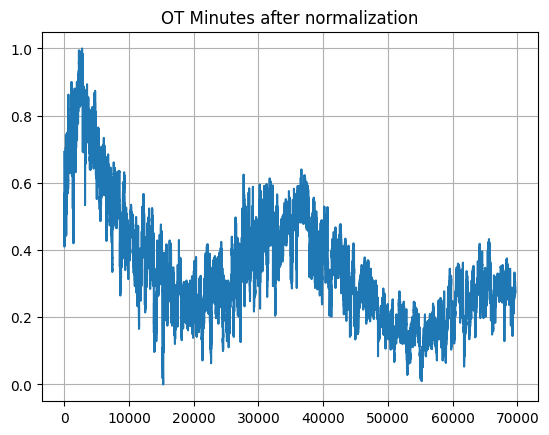

In [36]:
plt.title("OT Minutes after normalization")
plt.plot(np.arange(len(ot_m_scaled)),ot_m_scaled)
plt.grid(True)

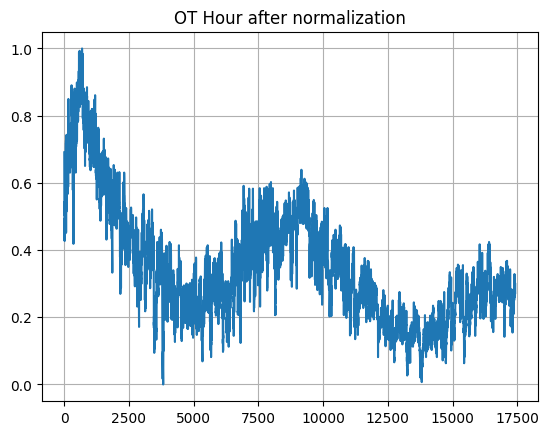

In [38]:
plt.title("OT Hour after normalization")
plt.plot(np.arange(len(ot_h_scaled)),ot_h_scaled)
plt.grid(True)

# 2) Training

## Helper

In [14]:
def plot_history(x, y, format="-", start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to average
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(15, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")
  

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()


def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    # Get predictions on the entire dataset
    forecast = model.predict(dataset)
    
    return forecast

## A. Data Splitting

In [76]:
split_time = 12500

# train
time_train=df_h["date"][:split_time]
X_train=ot_h_scaled[:split_time]

# val
time_val=df_h["date"][split_time:]
X_val=ot_h_scaled[split_time:]

In [136]:
len(time_val)

4920

## Training Normalisasi

In [126]:
# Parameters
window_size = 12
batch_size = 32
shuffle_buffer_size = 1000

In [127]:
# Generate the dataset windows
train_set = windowed_dataset(X_train, window_size, batch_size, shuffle_buffer_size)
val_set = windowed_dataset(X_val, window_size, batch_size, shuffle_buffer_size)

In [211]:
# Build the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
  #                     input_shape=[window_size]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

 # Print the model summary 
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 12, 64)            256       
                                                                 
 lstm_30 (LSTM)              (None, 12, 64)            33024     
                                                                 
 lstm_31 (LSTM)              (None, 64)                33024     
                                                                 
 dense_45 (Dense)            (None, 30)                1950      
                                                                 
 dense_46 (Dense)            (None, 10)                310       
                                                                 
 dense_47 (Dense)            (None, 1)                 11        
                                                                 
 lambda_26 (Lambda)          (None, 1)               

In [212]:
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [213]:
history = model.fit(train_set,epochs=50)

Epoch 1/50


391/391 [==============================] - 7s 12ms/step - loss: 0.0514 - mae: 0.1129
Epoch 2/50
391/391 [==============================] - 5s 12ms/step - loss: 0.0078 - mae: 0.0517
Epoch 3/50
391/391 [==============================] - 5s 11ms/step - loss: 5.1103e-04 - mae: 0.0240
Epoch 4/50
391/391 [==============================] - 5s 12ms/step - loss: 0.0088 - mae: 0.0511
Epoch 5/50
391/391 [==============================] - 5s 12ms/step - loss: 4.8440e-04 - mae: 0.0237
Epoch 6/50
391/391 [==============================] - 5s 11ms/step - loss: 6.0893e-04 - mae: 0.0267
Epoch 7/50
391/391 [==============================] - 5s 11ms/step - loss: 7.1652e-04 - mae: 0.0297
Epoch 8/50
391/391 [==============================] - 5s 12ms/step - loss: 0.0023 - mae: 0.0352
Epoch 9/50
391/391 [==============================] - 5s 12ms/step - loss: 7.3266e-04 - mae: 0.0287
Epoch 10/50
391/391 [==============================] - 5s 12ms/step - loss: 0.0018 - mae: 0.0392
Epoch 11/50
391/391 [=========

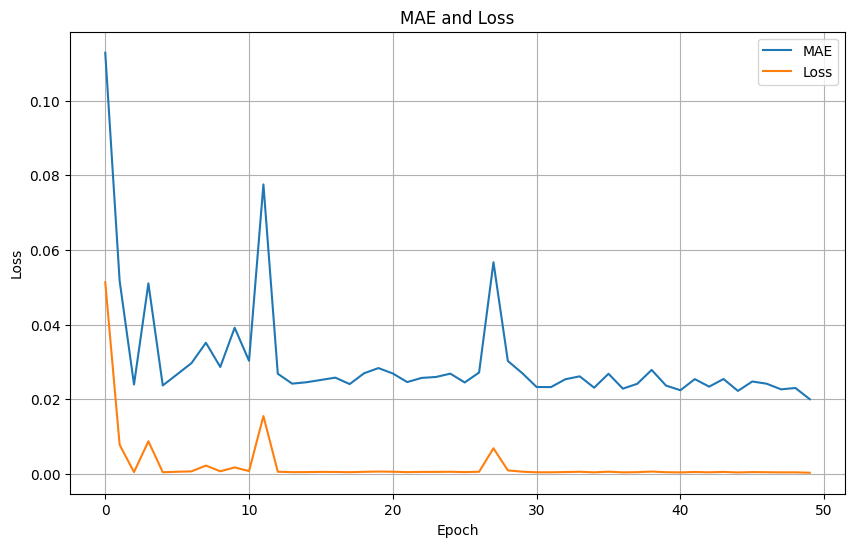

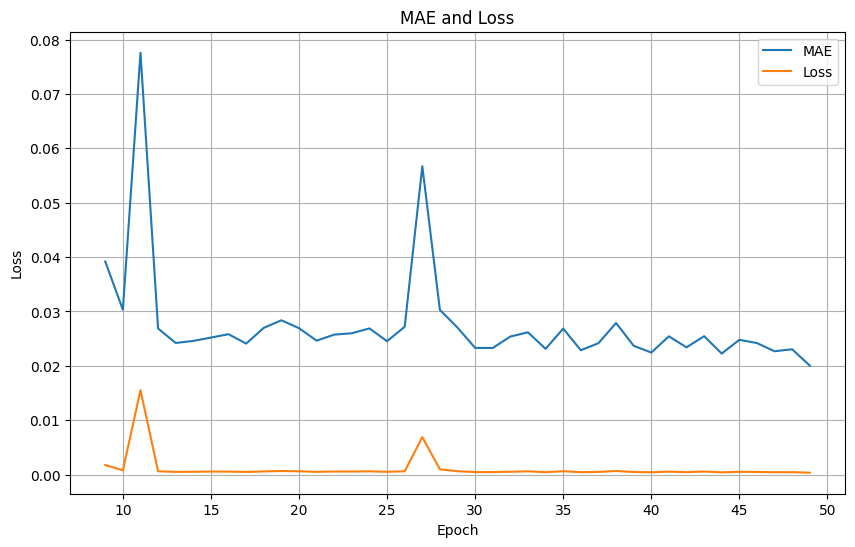

In [214]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_history(
    x=epochs, 
    y=(mae, loss), 
    title='MAE and Loss', 
    xlabel='Epoch',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_history(
    x=epochs_zoom, 
    y=(mae_zoom, loss_zoom), 
    title='MAE and Loss', 
    xlabel='Epoch',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

## Testing

In [215]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    # Get predictions on the entire dataset
    forecast = model.predict(dataset)
    
    return forecast

In [216]:
series= ot_h_scaled
forecast_series = series[split_time-window_size:-1]
forecast = model_forecast(model, forecast_series, window_size, batch_size)
results = forecast.squeeze()

154/154 [==============================] - 1s 5ms/step


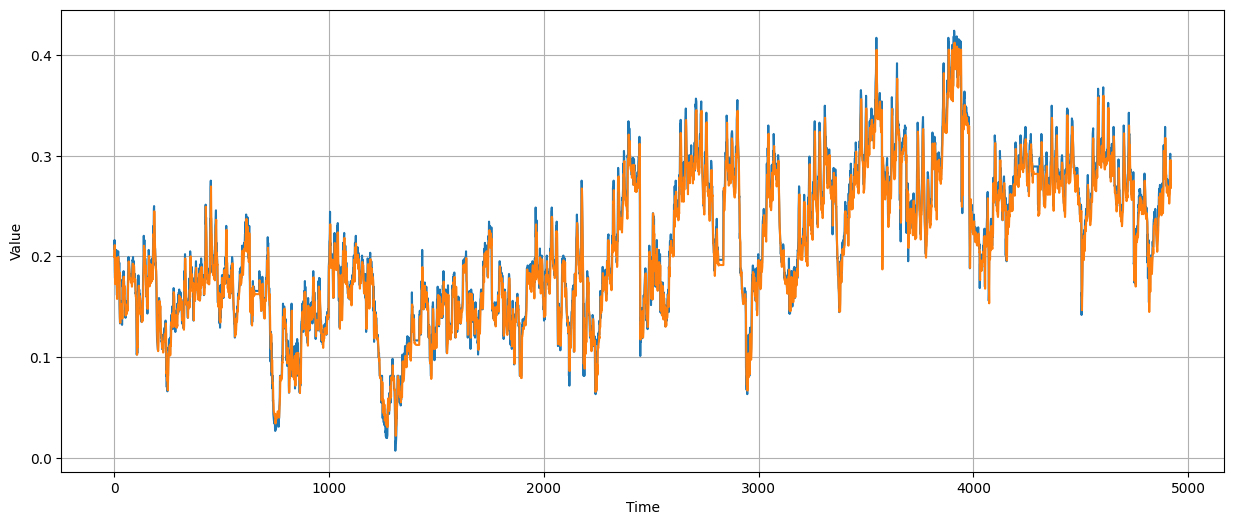

In [217]:
plot_series(np.arange(4920), (X_val, results))

In [218]:
series= ot_h_scaled
forecast_series = series[window_size:]
forecast = model_forecast(model, forecast_series, window_size, batch_size)
results = forecast.squeeze()

544/544 [==============================] - 3s 5ms/step


In [219]:
len(results)

17397

In [220]:
len(ot_h_scaled[window_size+11:])

17397

In [221]:
len(ot_h_scaled[window_size:-1])

17407

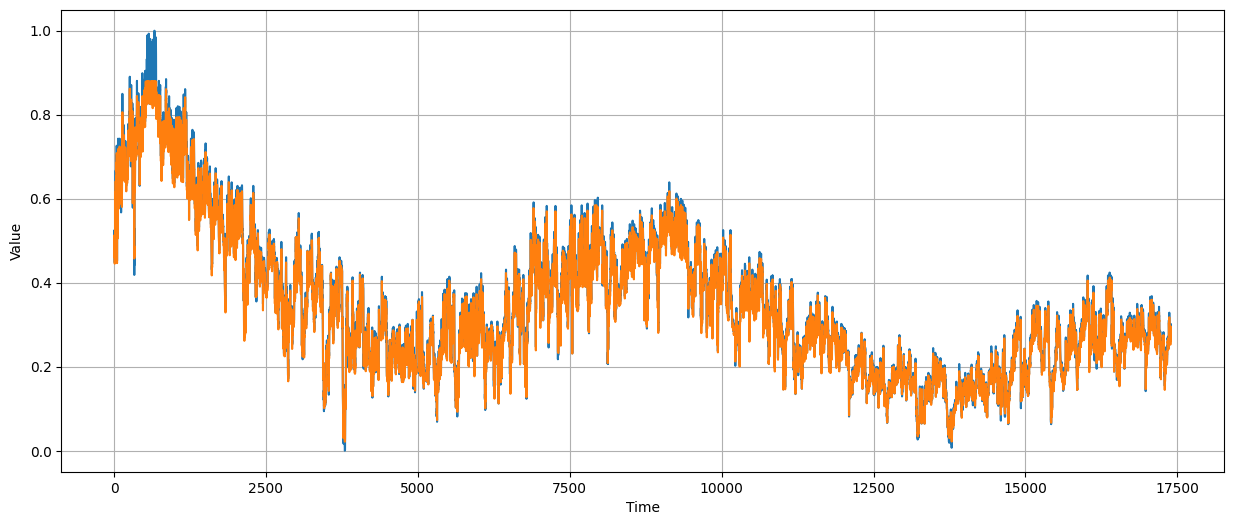

In [222]:
plot_series(np.arange(len(ot_h_scaled[window_size+11:])), (ot_h_scaled[window_size+11:], results))

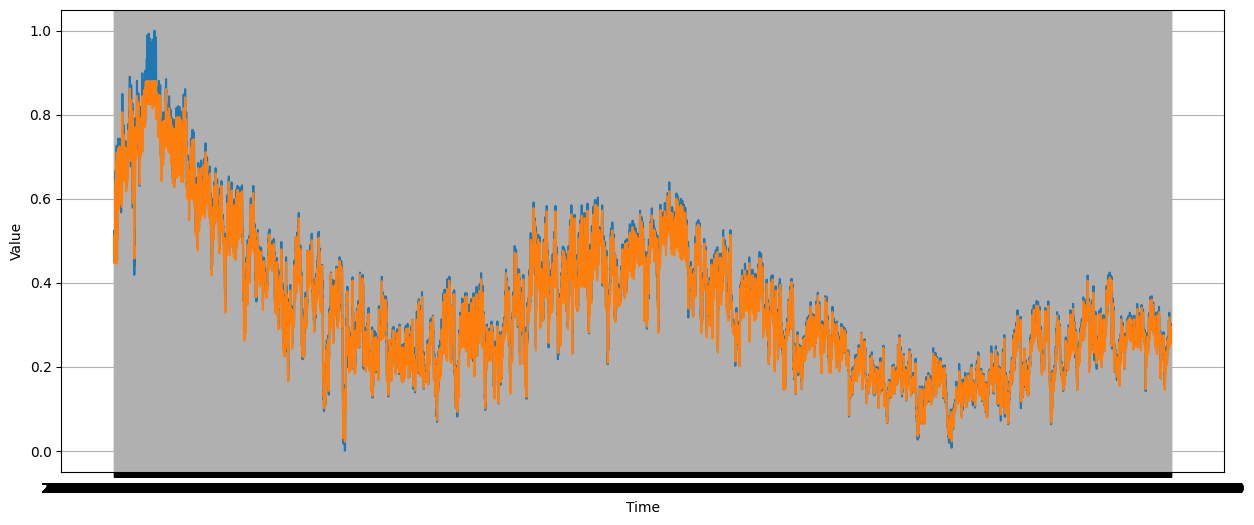

In [223]:
plot_series(df_h["date"][window_size+11:], (ot_h_scaled[window_size+11:], results))

# Training Non-normalisasi

In [236]:
split_time = 12500

# train
time_train=df_h["date"][:split_time]
X_train=ot_h[:split_time]

# val
time_val=df_h["date"][split_time:]
X_val=ot_h[split_time:]

In [237]:
# Parameters
window_size = 12
batch_size = 32
shuffle_buffer_size = 1000

In [238]:
# Generate the dataset windows
train_set = windowed_dataset(X_train, window_size, batch_size, shuffle_buffer_size)
val_set = windowed_dataset(X_val, window_size, batch_size, shuffle_buffer_size)

In [239]:
# Build the Model
model = tf.keras.models.Sequential([
  # tf.keras.layers.Conv1D(filters=64, kernel_size=3,
  #                     strides=1,
  #                     activation="relu",
  #                     padding='causal',
  #                     input_shape=[window_size, 1]),
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

 # Print the model summary 
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_28 (Lambda)          (None, 12, 1)             0         
                                                                 
 lstm_34 (LSTM)              (None, 12, 64)            16896     
                                                                 
 lstm_35 (LSTM)              (None, 64)                33024     
                                                                 
 dense_51 (Dense)            (None, 30)                1950      
                                                                 
 dense_52 (Dense)            (None, 10)                310       
                                                                 
 dense_53 (Dense)            (None, 1)                 11        
                                                                 
 lambda_29 (Lambda)          (None, 1)               

In [240]:
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [241]:
history = model.fit(train_set,epochs=75)

Epoch 1/75


391/391 [==============================] - 6s 9ms/step - loss: 2.7342 - mae: 3.1793
Epoch 2/75
391/391 [==============================] - 4s 9ms/step - loss: 0.9877 - mae: 1.4132
Epoch 3/75
391/391 [==============================] - 4s 9ms/step - loss: 0.6554 - mae: 1.0479
Epoch 4/75
391/391 [==============================] - 4s 9ms/step - loss: 0.5998 - mae: 0.9752
Epoch 5/75
391/391 [==============================] - 4s 9ms/step - loss: 0.5408 - mae: 0.9198
Epoch 6/75
391/391 [==============================] - 4s 9ms/step - loss: 0.5333 - mae: 0.9055
Epoch 7/75
391/391 [==============================] - 4s 9ms/step - loss: 0.5054 - mae: 0.8721
Epoch 8/75
391/391 [==============================] - 4s 9ms/step - loss: 0.4638 - mae: 0.8281
Epoch 9/75
391/391 [==============================] - 4s 9ms/step - loss: 0.5147 - mae: 0.8846
Epoch 10/75
391/391 [==============================] - 4s 9ms/step - loss: 0.4753 - mae: 0.8335
Epoch 11/75
391/391 [==============================] - 4s 9m

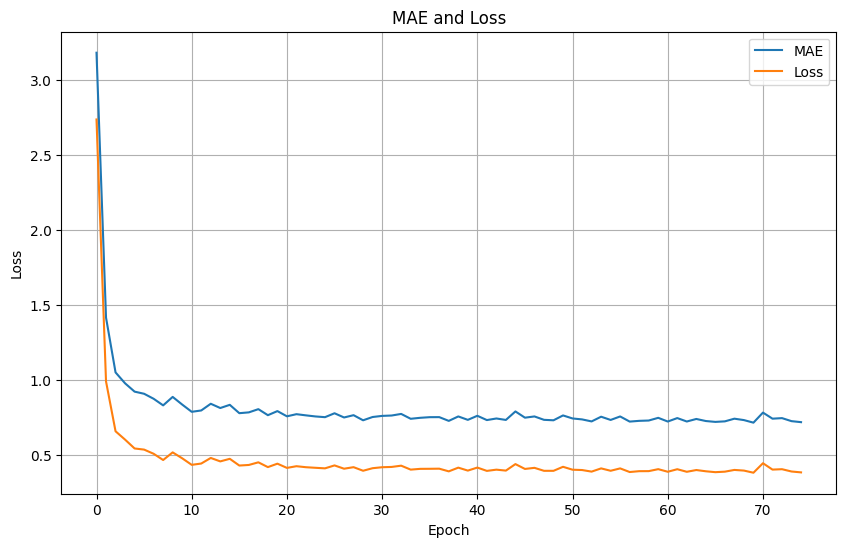

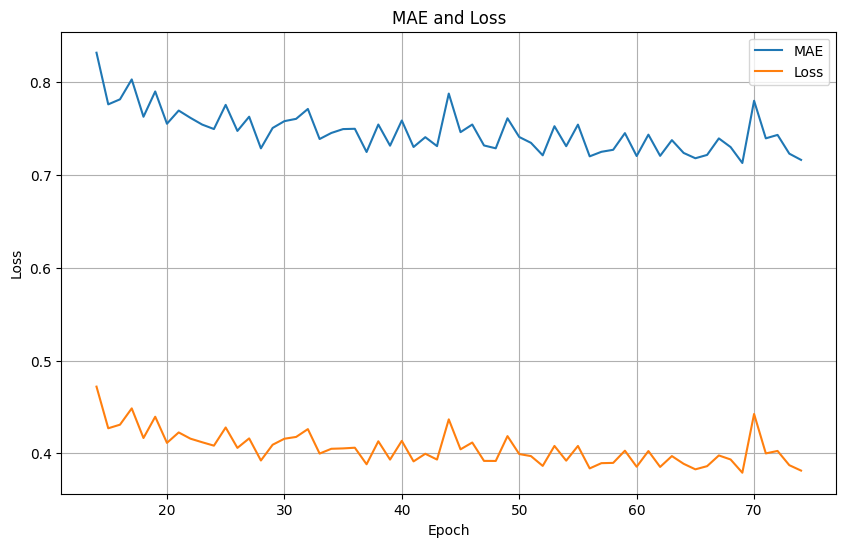

In [246]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_history(
    x=epochs, 
    y=(mae, loss), 
    title='MAE and Loss', 
    xlabel='Epoch',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_history(
    x=epochs_zoom, 
    y=(mae_zoom, loss_zoom), 
    title='MAE and Loss', 
    xlabel='Epoch',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

In [13]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    # Get predictions on the entire dataset
    forecast = model.predict(dataset)
    
    return forecast

In [248]:
series= ot_h
forecast_series = series[split_time-window_size:-1]
forecast = model_forecast(model, forecast_series, window_size, batch_size)
results = forecast.squeeze()

154/154 [==============================] - 1s 4ms/step


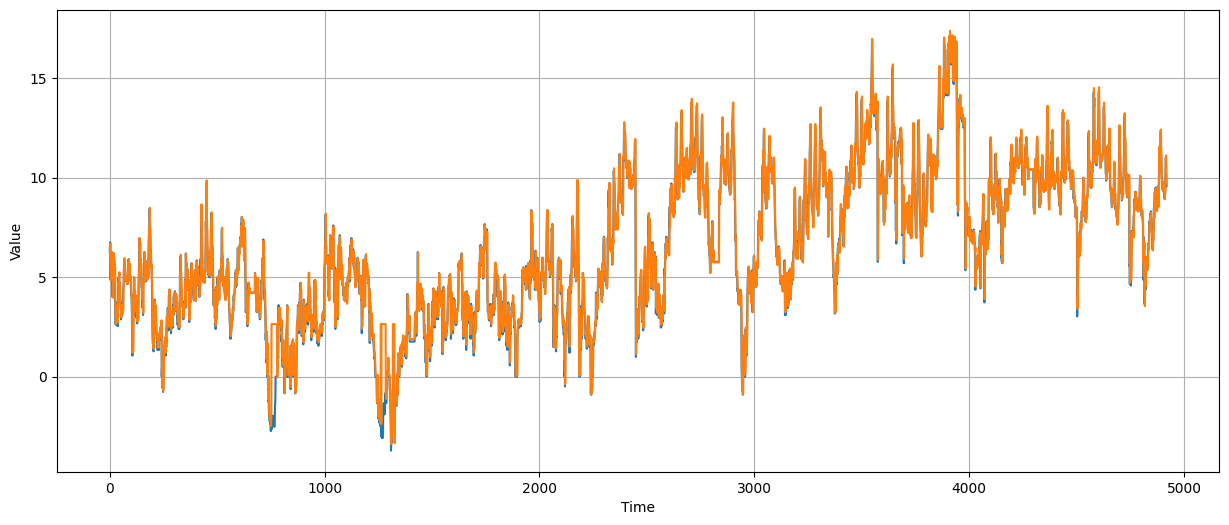

In [249]:
plot_series(np.arange(4920), (X_val, results))

In [259]:
print("MAE",tf.keras.metrics.mean_absolute_error(X_val,results).numpy())
print("MSE",tf.keras.metrics.mean_squared_error(X_val,results).numpy())

MAE 0.48224542
MSE 0.6057541


# LSTM With Cyclic Learning Rate

In [260]:
!pip install tensorflow-addons

  Obtaining dependency information for tensorflow-addons from https://files.pythonhosted.org/packages/2e/24/67281758c14d3c5c79b6823b919f80eb1568c887ded99e9570ce627f32b5/tensorflow_addons-0.21.0-cp310-cp310-win_amd64.whl.metadata
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
    --------------------------------------- 10.2/719.8 kB ? eta -:--:--
   --- ----------------------------------- 71.7/719.8 kB 653.6 kB/s eta 0:00:01
   ----- -------------------------------- 112.6/719.8 kB 819.2 kB/s eta 0:00:01
   --------- ---------------------------- 174.1/719.8 kB 952.6 kB/s eta 0:00:01
   ----------- -------------------------- 225.3/719.8 kB 915.1 kB/s eta 0:00:01
   ------------------ --------------------- 337.9/719.8 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 460.8/719.8 kB 1.4 MB/s eta 0:00:01
   ----------------------------- ---------- 532.5/719.8 kB 1.5 MB/s eta 0:00:01
   --------

In [5]:
from tensorflow_addons.optimizers import CyclicalLearningRate

c:\Users\arthu\Documents\EDUCATION\Kuliah\SEM 7\Code\.venv\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\arthu\Documents\EDUCATION\Kuliah\SEM 7\Code\.venv\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were t

In [287]:
cyclical_learning_rate = CyclicalLearningRate(
 initial_learning_rate=3e-7,
 maximal_learning_rate=3e-3,
 step_size=391*2,
 scale_fn=lambda x: 1 / (2.0 ** (x - 1)),
 scale_mode='cycle')

In [288]:
split_time = 12500

# train
time_train=df_h["date"][:split_time]
X_train=ot_h[:split_time]

# val
time_val=df_h["date"][split_time:]
X_val=ot_h[split_time:]

In [289]:
# Parameters
window_size = 12
batch_size = 32
shuffle_buffer_size = 1000

In [290]:
# Generate the dataset windows
train_set = windowed_dataset(X_train, window_size, batch_size, shuffle_buffer_size)
val_set = windowed_dataset(X_val, window_size, batch_size, shuffle_buffer_size)

In [291]:
# Build the Model
model = tf.keras.models.Sequential([
  # tf.keras.layers.Conv1D(filters=64, kernel_size=3,
  #                     strides=1,
  #                     activation="relu",
  #                     padding='causal',
  #                     input_shape=[window_size, 1]),
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

 # Print the model summary 
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_33 (Lambda)          (None, 12, 1)             0         
                                                                 
 lstm_40 (LSTM)              (None, 12, 64)            16896     
                                                                 
 lstm_41 (LSTM)              (None, 64)                33024     
                                                                 
 dense_60 (Dense)            (None, 30)                1950      
                                                                 
 dense_61 (Dense)            (None, 10)                310       
                                                                 
 dense_62 (Dense)            (None, 1)                 11        
                                                                 
 lambda_34 (Lambda)          (None, 1)               

In [292]:
optimizer = tf.keras.optimizers.Adam(cyclical_learning_rate)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [293]:
history = model.fit(train_set,epochs=75)

Epoch 1/75


391/391 [==============================] - 6s 8ms/step - loss: 1.5317 - mae: 1.9692
Epoch 2/75
391/391 [==============================] - 3s 8ms/step - loss: 0.9039 - mae: 1.3096
Epoch 3/75
391/391 [==============================] - 3s 8ms/step - loss: 0.7296 - mae: 1.1179
Epoch 4/75
391/391 [==============================] - 3s 8ms/step - loss: 0.4810 - mae: 0.8278
Epoch 5/75
391/391 [==============================] - 3s 8ms/step - loss: 0.4121 - mae: 0.7514
Epoch 6/75
391/391 [==============================] - 3s 8ms/step - loss: 0.4463 - mae: 0.8019
Epoch 7/75
391/391 [==============================] - 3s 8ms/step - loss: 0.4362 - mae: 0.7878
Epoch 8/75
391/391 [==============================] - 3s 8ms/step - loss: 0.3891 - mae: 0.7218
Epoch 9/75
391/391 [==============================] - 3s 8ms/step - loss: 0.3807 - mae: 0.7106
Epoch 10/75
391/391 [==============================] - 3s 8ms/step - loss: 0.3958 - mae: 0.7339
Epoch 11/75
391/391 [==============================] - 3s 8m

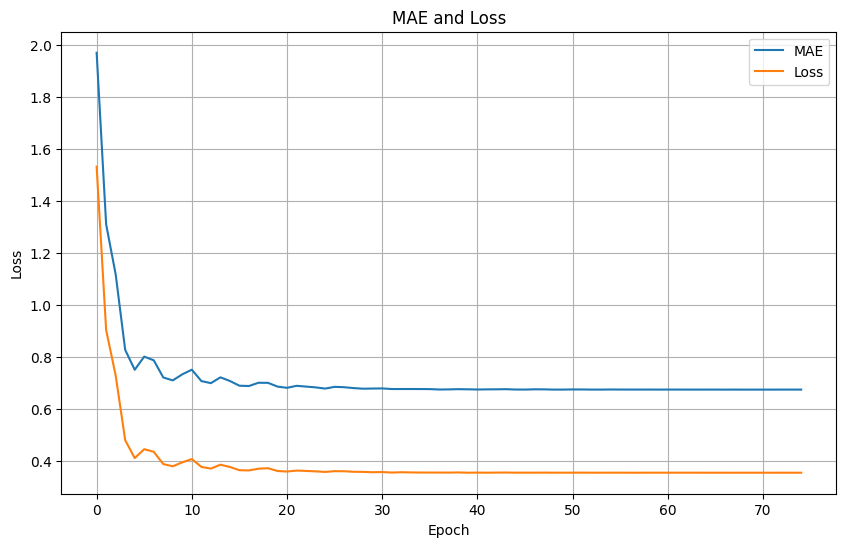

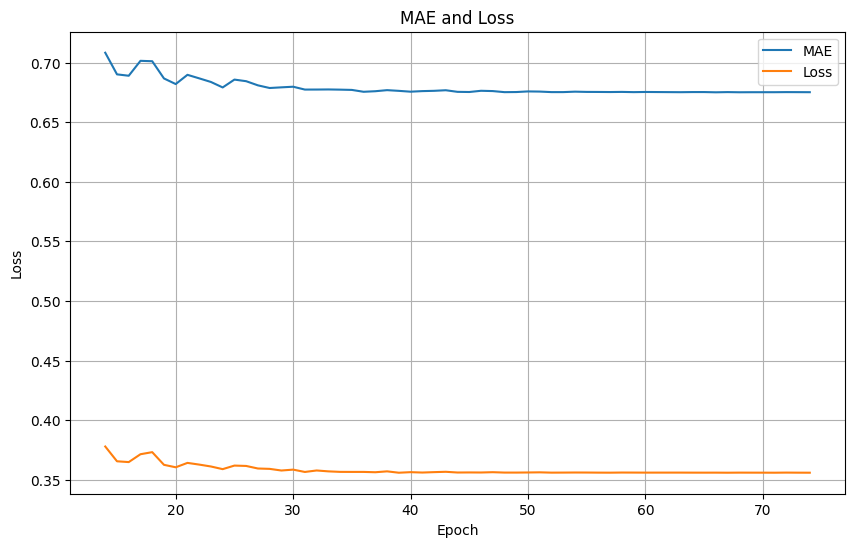

In [298]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_history(
    x=epochs, 
    y=(mae, loss), 
    title='MAE and Loss', 
    xlabel='Epoch',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_history(
    x=epochs_zoom, 
    y=(mae_zoom, loss_zoom), 
    title='MAE and Loss', 
    xlabel='Epoch',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

In [299]:
series= ot_h
forecast_series = series[split_time-window_size:-1]
forecast = model_forecast(model, forecast_series, window_size, batch_size)
results = forecast.squeeze()

154/154 [==============================] - 1s 4ms/step


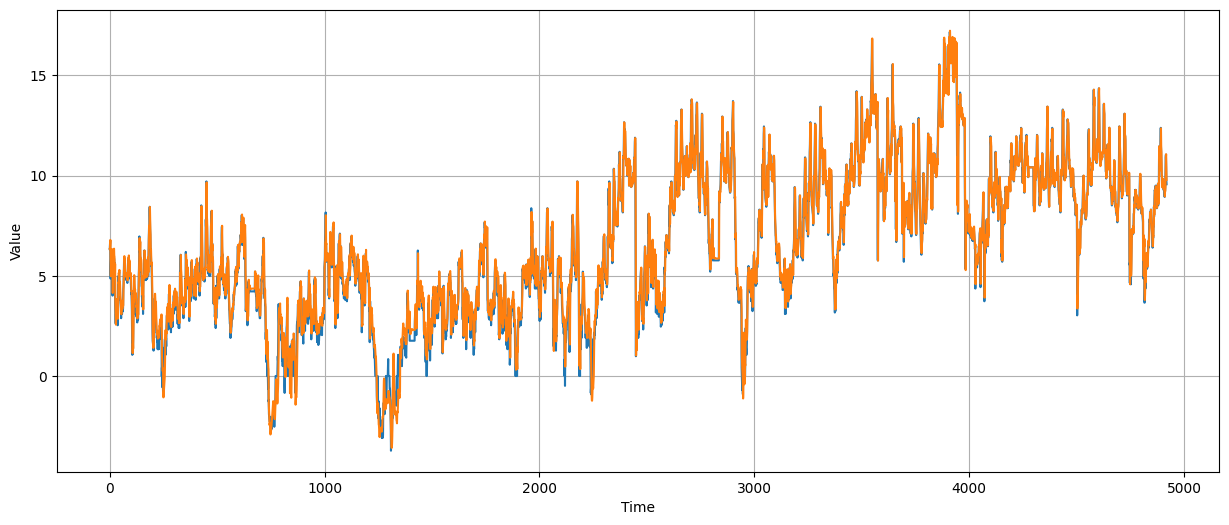

In [296]:
plot_series(np.arange(4920), (X_val, results))

In [301]:
print("MAE",tf.keras.metrics.mean_absolute_error(X_val,results).numpy())
print("MSE",tf.keras.metrics.mean_squared_error(X_val,results).numpy())

MAE 0.48092884
MSE 0.4578833


# LSTM with Cyclic Learning Rate ETTm2

In [3]:
ETTm2=pd.read_csv("Data/ETTm2.csv")

In [33]:
cyclical_learning_rate = CyclicalLearningRate(
 initial_learning_rate=3e-7,
 maximal_learning_rate=3e-3,
 step_size=860*4,
 scale_fn=lambda x: 1 / (2.0 ** (x - 1)),
 scale_mode='cycle')

In [34]:
ETTm2OT=ETTm2["OT"].to_numpy()

In [35]:
split_time = 60000

# train
time_train=ETTm2["date"][:split_time]
X_train=ETTm2OT[:split_time]

# val
time_val=ETTm2["date"][split_time:]
X_val=ETTm2OT[split_time:]

In [36]:
window_size = 20
batch_size = 64
shuffle_buffer_size = 5000

In [37]:
# Generate the dataset windows
train_set = windowed_dataset(X_train, window_size, batch_size, shuffle_buffer_size)
val_set = windowed_dataset(X_val, window_size, batch_size, shuffle_buffer_size)

In [38]:
# Build the Model
model = tf.keras.models.Sequential([
  # tf.keras.layers.Conv1D(filters=64, kernel_size=3,
  #                     strides=1,
  #                     activation="relu",
  #                     padding='causal',
  #                     input_shape=[window_size, 1]),
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

 # Print the model summary 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 20, 1)             0         
                                                                 
 lstm_4 (LSTM)               (None, 20, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 30)                1950      
                                                                 
 dense_7 (Dense)             (None, 10)                310       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
 lambda_5 (Lambda)           (None, 1)                

In [39]:
optimizer = tf.keras.optimizers.Adam(cyclical_learning_rate)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [40]:
history = model.fit(train_set,epochs=75)

Epoch 1/75


860/860 [==============================] - 15s 14ms/step - loss: 6.6186 - mae: 6.9764
Epoch 2/75
860/860 [==============================] - 13s 15ms/step - loss: 0.2273 - mae: 0.5082
Epoch 3/75
860/860 [==============================] - 14s 16ms/step - loss: 0.1206 - mae: 0.3184
Epoch 4/75
 29/860 [>.............................] - ETA: 12s - loss: 0.1278 - mae: 0.3940

KeyboardInterrupt: 

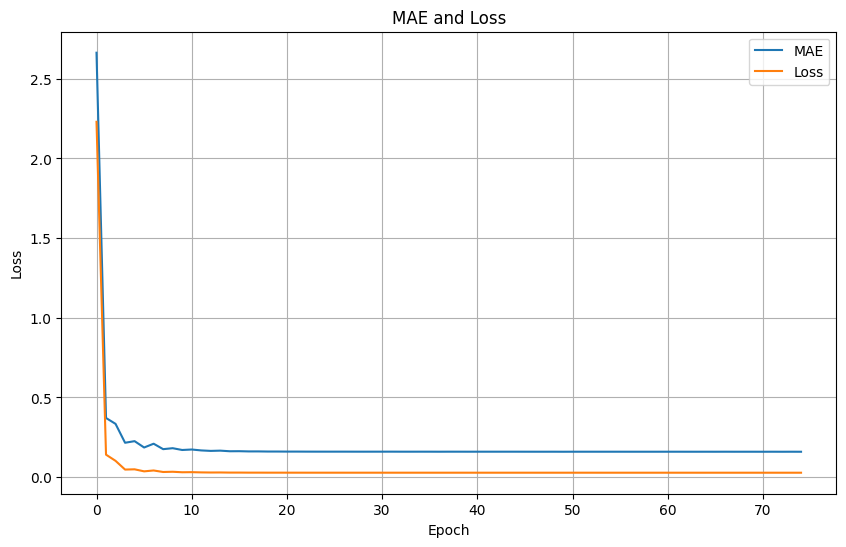

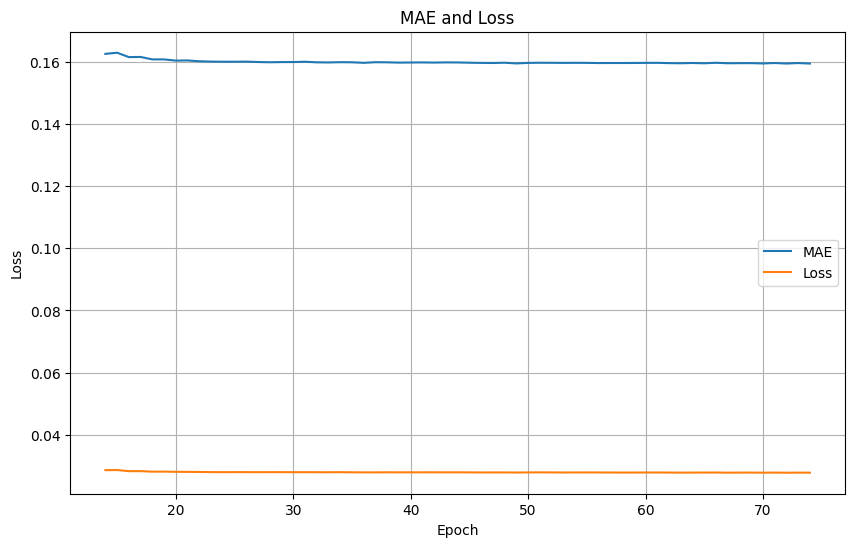

In [ ]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_history(
    x=epochs, 
    y=(mae, loss), 
    title='MAE and Loss', 
    xlabel='Epoch',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_history(
    x=epochs_zoom, 
    y=(mae_zoom, loss_zoom), 
    title='MAE and Loss', 
    xlabel='Epoch',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

In [ ]:
series= ETTm2OT
forecast_series = series[split_time-window_size:-1]
forecast = model_forecast(model, forecast_series, window_size, batch_size)
results = forecast.squeeze()

230/230 [==============================] - 2s 4ms/step


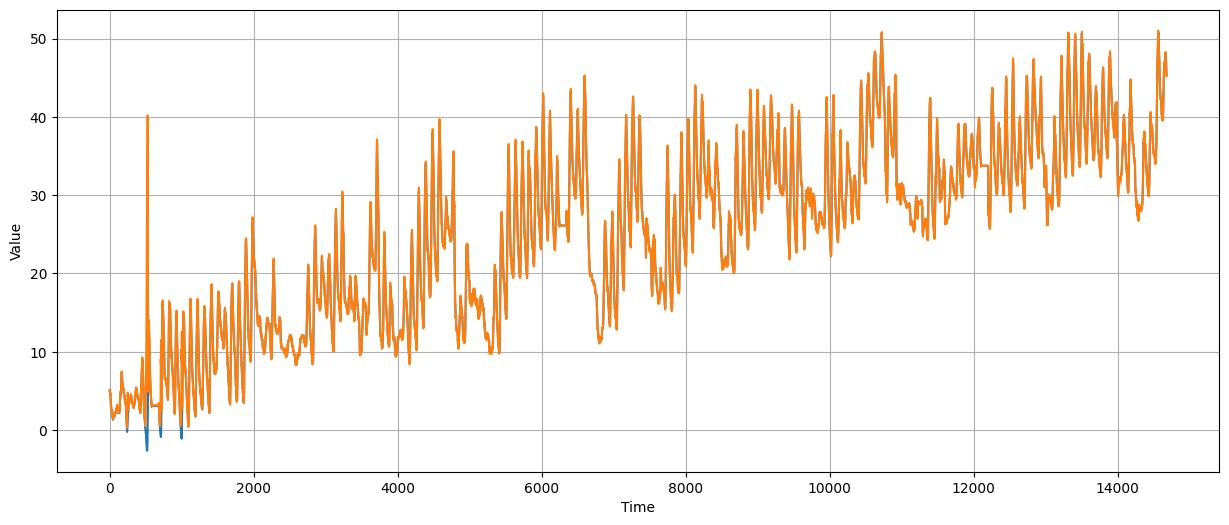

In [ ]:
plot_series(np.arange(14680), (X_val, results))

In [ ]:
print("MAE",tf.keras.metrics.mean_absolute_error(X_val,results).numpy())
print("MSE",tf.keras.metrics.mean_squared_error(X_val,results).numpy())

MAE 0.22699976
MSE 1.6784121
